In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import nltk
from string import punctuation
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
  
wn = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
import string
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directo

In [12]:
test=pd.read_csv('../input/nlp-getting-started/test.csv',sep=',')
train=pd.read_csv('../input/nlp-getting-started/train.csv',sep=',')

In [13]:
print(test)

         id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
3261  MEG issues Hazardous Weather 

In [14]:
def explore_data(df):
    
    
    '''Input- df= pandas dataframes to be explored
       Output- print shape, info and first 5 records of the dataframe 
    '''
    
    print("-"*50)
    print('Shape of the dataframe:',df.shape)
    print("Number of records in train data set:",df.shape[0])
    print("Information of the dataset:")
    df.info()
    print("-"*50)
    print("First 5 records of the dataset:")
    return df.head()
    print("-"*50)

In [15]:
explore_data(train)

--------------------------------------------------
Shape of the dataframe: (7613, 5)
Number of records in train data set: 7613
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
--------------------------------------------------
First 5 records of the dataset:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
explore_data(test)

--------------------------------------------------
Shape of the dataframe: (3263, 4)
Number of records in train data set: 3263
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
--------------------------------------------------
First 5 records of the dataset:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [17]:
def missing_values(df):
    print('{}% of location values are missing from Total Number of Records.'.format(round((df.location.isnull().sum())/(df.shape[0])*100),2))
    print('{}% of keywords values are missing from Total Number of Records.'.format(round((df.keyword.isnull().sum())/(df.shape[0])*100),2))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
    null_feat = pd.DataFrame(len(df['id']) - df.isnull().sum(), columns = ['Count'])

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey', line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values")
                    
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)


33% of location values are missing from Total Number of Records.
1% of keywords values are missing from Total Number of Records.


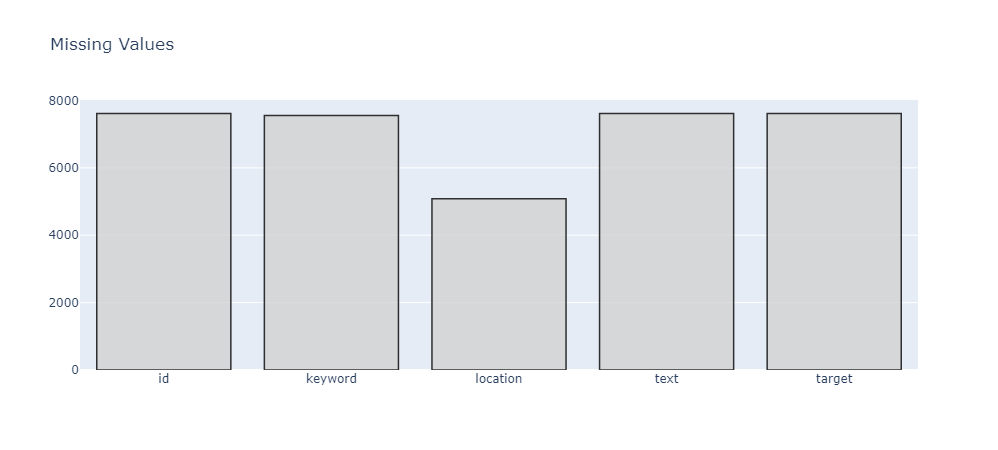

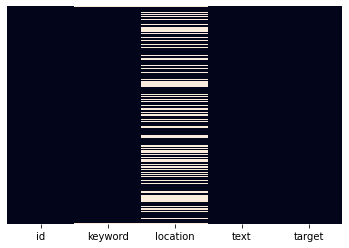

In [19]:
missing_values(train)

34% of location values are missing from Total Number of Records.
1% of keywords values are missing from Total Number of Records.


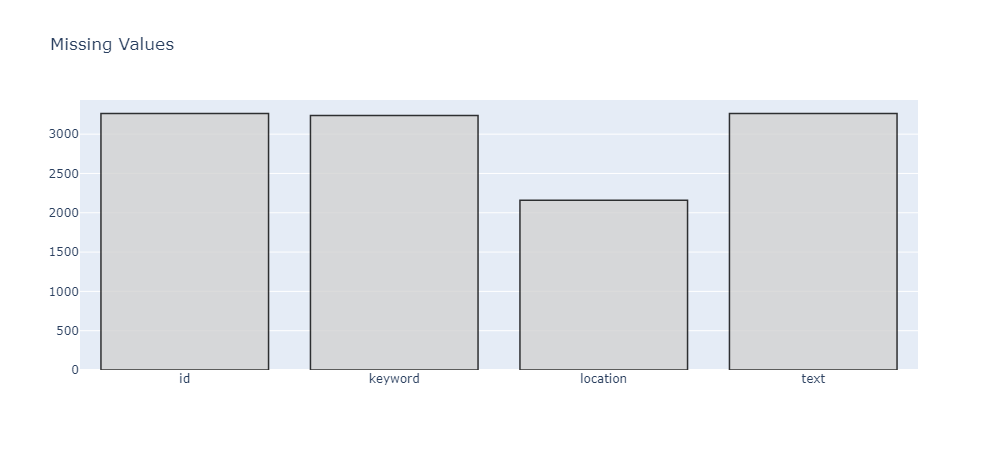

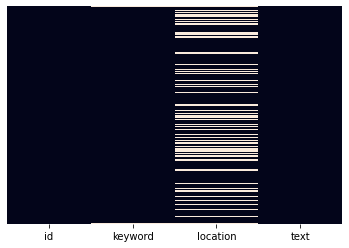

In [20]:
missing_values(test)

In [21]:
print(f'Number of unique values in keyword = {train["keyword"].nunique()} (Training) - {test["keyword"].nunique()} (Test)')
print(f'Number of unique values in location = {train["location"].nunique()} (Training) - {test["location"].nunique()} (Test)')

Number of unique values in keyword = 221 (Training) - 221 (Test)
Number of unique values in location = 3341 (Training) - 1602 (Test)


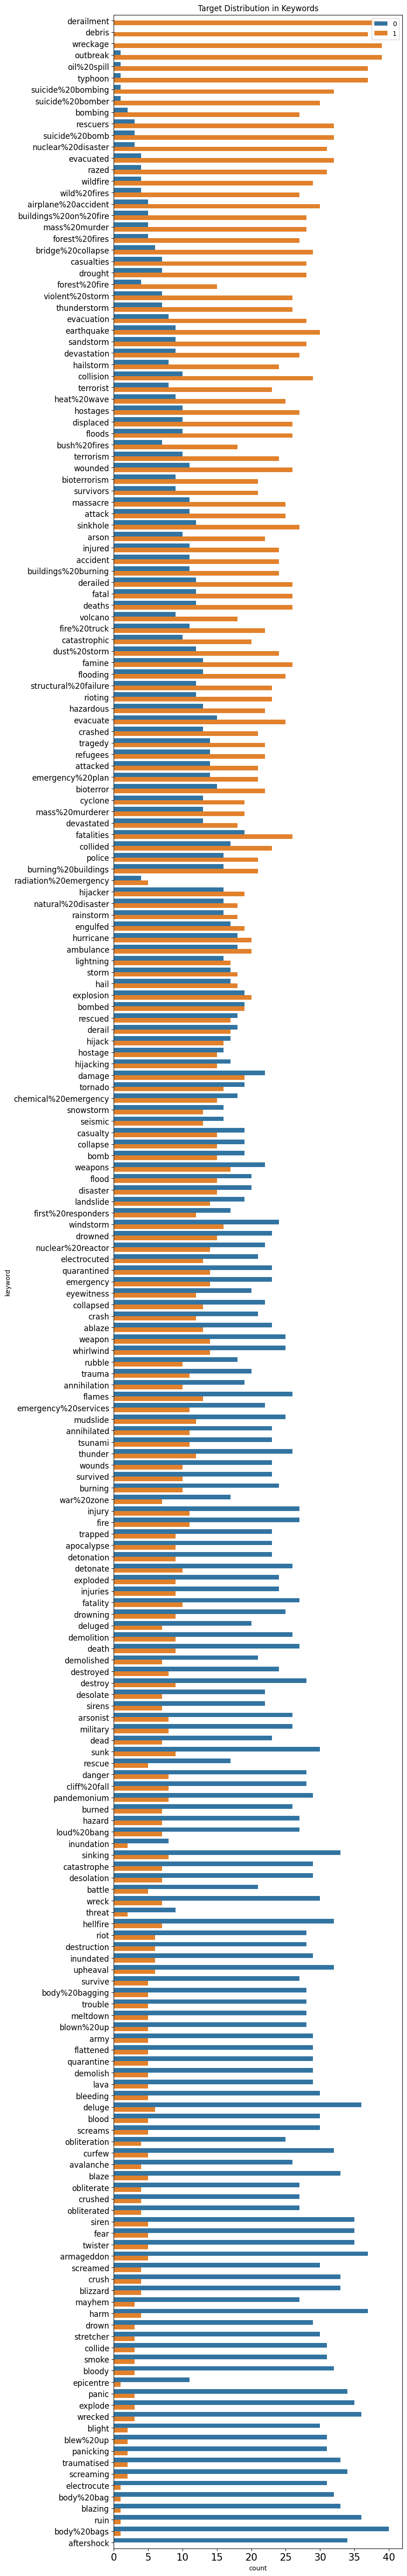

In [23]:
train['target_mean'] = train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train.drop(columns=['target_mean'], inplace=True)

Target of 0 is 57 % of total
Target of 1 is 43 % of total


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'samples')

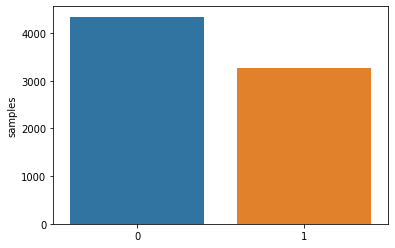

In [24]:
print('Target of 0 is {} % of total'.format(round(train['target'].value_counts()[0]/len(train['target'])*100)))
print('Target of 1 is {} % of total'.format(round(train['target'].value_counts()[1]/len(train['target'])*100)))
x=train.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

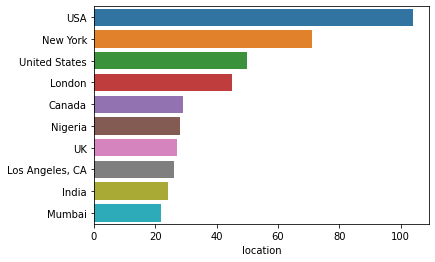

In [25]:
sns.barplot(y=train['location'].value_counts()[:10].index,x=train['location'].value_counts()[:10],orient='h');

In [26]:
train=train.drop(['location'],axis=1)

In [27]:
train[train['target']==1]['text'][10:20]

10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
37    INEC Office in Abia Set Ablaze - http://t.co/3...
38    Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
46    How the West was burned: Thousands of wildfire...
Name: text, dtype: object

In [33]:
#A non-disaster tweet example
train[train['target']==0]['text'][10:20]

25                       No way...I can't eat that shit
26                                Was in NYC last week!
27                                   Love my girlfriend
28                                            Cooool :)
29                                   Do you like pasta?
30                                             The end!
32    We always try to bring the heavy. #metal #RT h...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36    @PhDSquares #mufc they've built so much hype a...
Name: text, dtype: object

In [35]:
train['words_count'] = train['text'].str.split().map(lambda x: len(x))
train

,id,keyword,text,target,words_count
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16
...,...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,NaN,Police investigating after an e-bike collided ...,1,19


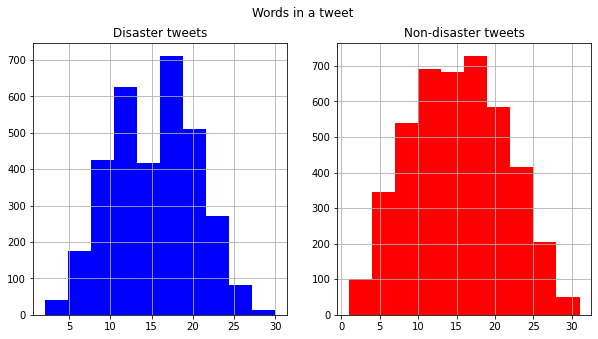

In [39]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
dis_tweet=train[train['target']==1]['words_count']
ax1.hist(dis_tweet,color='blue')
ax1.set_title('Disaster tweets')
ax1.grid()
nondis_tweet=train[train['target']==0]['words_count']
ax2.hist(nondis_tweet,color='red')
ax2.set_title('Non-disaster tweets')
ax2.grid()
fig.suptitle('Words in a tweet')
plt.show()

In [40]:
train['text_length'] = train['text'].apply(lambda x : len(x))
train.head()

,id,keyword,text,target,words_count,text_length
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,7,38
2,5,NaN,All residents asked to 'shelter in place' are ...,1,22,133
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



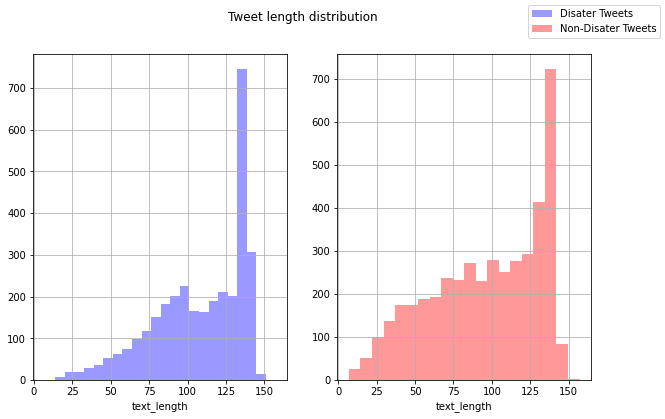

In [41]:
#Create visualization of the distribution of text length in comparision to target feature
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(10,6))
sns.distplot(train[(train['target'] == 1)]['text_length'], ax=ax1, kde=False, color='blue',label='Disater Tweets')
sns.distplot(train[(train['target'] == 0)]['text_length'],ax=ax2, kde=False, color='red',label='Non-Disater Tweets');
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

In [42]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation ]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

# Remove punctuation from both train and test dataset
train['text_wo_punct']=train['text'].apply(lambda x: remove_punctuation(x))
test['text_wo_punct']=test['text'].apply(lambda x: remove_punctuation(x))

train.head()

,id,keyword,text,target,words_count,text_length,text_wo_punct
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,Forest fire near La Ronge Sask Canada
2,5,NaN,All residents asked to 'shelter in place' are ...,1,22,133,All residents asked to shelter in place are be...
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,13000 people receive wildfires evacuation orde...
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,Just got sent this photo from Ruby Alaska as s...


In [44]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split
train['text_wo_punct_split']=train['text_wo_punct'].apply(lambda x: tokenize(x.lower()))
test['text_wo_punct_split']=test['text_wo_punct'].apply(lambda x: tokenize(x.lower()))

train.head()


,id,keyword,text,target,words_count,text_length,text_wo_punct,text_wo_punct_split
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,All residents asked to 'shelter in place' are ...,1,22,133,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


In [45]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [46]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text

train['text_wo_punct_split_wo_stopwords']=train['text_wo_punct_split'].apply(lambda x: remove_stopwords(x))
test['text_wo_punct_split_wo_stopwords']=test['text_wo_punct_split'].apply(lambda x: remove_stopwords(x))
train.head()

,id,keyword,text,target,words_count,text_length,text_wo_punct,text_wo_punct_split,text_wo_punct_split_wo_stopwords
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,All residents asked to 'shelter in place' are ...,1,22,133,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [47]:
print(ps.stem('believe'))
print(ps.stem('believing'))
print(ps.stem('believed'))
print(ps.stem('believes'))

believ
believ
believ
believ


In [49]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer=nltk.stem.WordNetLemmatizer()

print(lemmatizer.lemmatize('believe'))
print(lemmatizer.lemmatize('believing'))
print(lemmatizer.lemmatize('believed'))
print(lemmatizer.lemmatize('believes'))


believe
believing
believed
belief


In [50]:
def lemmatize_text(word_list):
    
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output


train['text_wo_punct_split_wo_stopwords_lim']=train['text_wo_punct_split_wo_stopwords'].apply(lambda x: lemmatize_text(x))
test['text_wo_punct_split_wo_stopwords_lim']=test['text_wo_punct_split_wo_stopwords'].apply(lambda x: lemmatize_text(x))
train.head()

,id,keyword,text,target,words_count,text_length,text_wo_punct,text_wo_punct_split,text_wo_punct_split_wo_stopwords,text_wo_punct_split_wo_stopwords_lim
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deed reason earthquake may allah forgive u
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,All residents asked to 'shelter in place' are ...,1,22,133,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",resident asked shelter place notified officer ...
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...",13000 people receive wildfire evacuation order...
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [51]:
def text_clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub('<.*?>+', '', text)
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text = regrex_pattern.sub(r'',text)
    text = ''.join([i for i in text if not i.isdigit()])
    return text


In [63]:
train['clean_text']=train['text_wo_punct_split_wo_stopwords_lim'].apply(lambda x: text_clean(x))
test['clean_text']=test['text_wo_punct_split_wo_stopwords_lim'].apply(lambda x: text_clean(x))
test

,id,keyword,location,text,text_wo_punct,text_wo_punct_split,text_wo_punct_split_wo_stopwords,text_wo_punct_split_wo_stopwords_lim,clean_text
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash,"[just, happened, a, terrible, car, crash]","[happened, terrible, car, crash]",happened terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...,"[heard, about, earthquake, is, different, citi...","[heard, earthquake, different, cities, stay, s...",heard earthquake different city stay safe ever...,heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,"[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, geese, fleeing, acr...",forest fire spot pond goose fleeing across str...,forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires,"[apocalypse, lighting, spokane, wildfires]","[apocalypse, lighting, spokane, wildfires]",apocalypse lighting spokane wildfire,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, 28, in, china, and,...","[typhoon, soudelor, kills, 28, china, taiwan]",typhoon soudelor kill 28 china taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,"[earthquake, safety, los, angeles, ûò, safety,...","[earthquake, safety, los, angeles, ûò, safety,...",earthquake safety los angeles ûò safety fasten...,earthquake safety los angeles ûò safety fasten...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane My citya...,"[storm, in, ri, worse, than, last, hurricane, ...","[storm, ri, worse, last, hurricane, cityamp3ot...",storm ri worse last hurricane cityamp3others h...,storm ri worse last hurricane cityampothers ha...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,Green Line derailment in Chicago httptcoUtbXLc...,"[green, line, derailment, in, chicago, httptco...","[green, line, derailment, chicago, httptcoutbx...",green line derailment chicago httptcoutbxlcbiuy,green line derailment chicago httptcoutbxlcbiuy
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,MEG issues Hazardous Weather Outlook HWO httpt...,"[meg, issues, hazardous, weather, outlook, hwo...","[meg, issues, hazardous, weather, outlook, hwo...",meg issue hazardous weather outlook hwo httptc...,meg issue hazardous weather outlook hwo httptc...


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer()
train_df = count_vectorizer.fit_transform(train['clean_text'])
test_df = count_vectorizer.transform(test["clean_text"])
print(train_df[0].todense())

[[0 0 0 ... 0 0 0]]


In [58]:
from sklearn.model_selection import train_test_split

#Split the CountVector vectorized data into train and test datasets for model training and testing
x_train, x_test, y_train, y_test =train_test_split(train_df,train.target,test_size=0.2,random_state=2020)
print('Shape of train',x_train.shape)
print("Shape of Validation ",x_test.shape)

Shape of train (6090, 20133)
Shape of Validation  (1523, 20133)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RDclassifier = RandomForestClassifier(n_estimators=1000, random_state=0)
RDclassifier.fit(X_train,y_train)

In [61]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)
train_pred_m = classifier_mb.predict(x_test)
accuracy_train_m = np.mean(train_pred_m==y_test) # 96%
accuracy_train_m

0.7984241628365069

In [64]:
import pickle

with open('text_classifier', 'wb') as picklefile:
    pickle.dump(classifier_mb,picklefile)

In [65]:
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)

In [71]:
y_pred2 = model.predict(test_df)
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
sample_submission = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
data={"id":[],"target":[]}
for id,pred in zip(sample_submission['id'].unique(),y_pred2): 
    data["id"].append(id) 
    data["target"].append(pred)

    
output=pd.DataFrame(data,columns=["id","target"])
output
print(output)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

         id  target
0         0       1
1         2       1
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       1
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       1

[3263 rows x 2 columns]
Your submission was successfully saved!
